In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data/step2_output.csv')

In [3]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataframe.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

In [5]:
dataframe.chol.value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [6]:
dataframe.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

<AxesSubplot:>

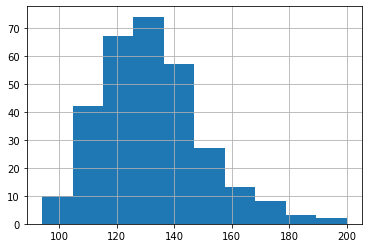

In [7]:
dataframe.trestbps.hist()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

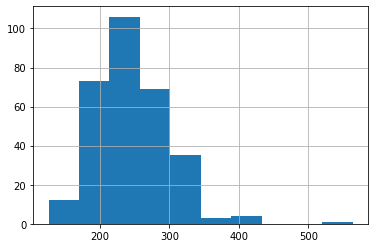

In [9]:
dataframe.chol.hist()

<AxesSubplot:>

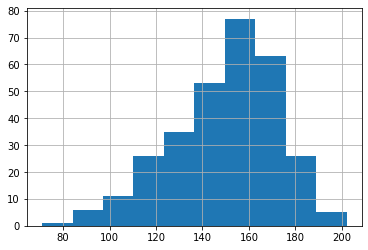

In [10]:
dataframe.thalach.hist()

In [11]:
def new_feature(row):
    magnitude = 1
    if(row <= 100):
        magnitude = 1
    elif(row > 100 and row <= 140):
        magnitude = 2
    elif(row > 140 and row <= 180):
        magnitude = 3
    else:
        magnitude = 4
        
    return magnitude

dataframe['trestbps_range'] = dataframe['trestbps'].apply(lambda x : new_feature(x))

In [12]:
dataframe['trestbps_range'].value_counts()

2    232
3     63
1      6
4      2
Name: trestbps_range, dtype: int64

In [13]:
dataframe['thalach_range'] = dataframe['thalach'].apply(lambda x : new_feature(x))

In [14]:
dataframe['thalach_range'].value_counts()

3    194
2     83
4     18
1      8
Name: thalach_range, dtype: int64

In [15]:
def new_feature_two(row):
    magnitude = 1
    if(row <= 200):
        magnitude = 1
    elif(row > 200 and row <= 300):
        magnitude = 2
    elif(row > 400 and row <= 500):
        magnitude = 3
    else:
        magnitude = 4
        
    return magnitude

dataframe['chol_range'] = dataframe['chol'].apply(lambda x : new_feature_two(x))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

X = dataframe.drop(['target'],axis=1)
Y = dataframe['target']

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,trestbps_range,thalach_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,3,3,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,2,4,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,2,3,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,2,3,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,2,3,4


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
new_scaled_dataframe = pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
new_scaled_dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,trestbps_range,thalach_range,chol_range
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1.728131,0.440987,-0.126671
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,-0.435603,2.090603,-0.126671
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,-0.435603,0.440987,-0.126671
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,-0.435603,0.440987,-0.126671
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,-0.435603,0.440987,2.272167


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=47)

In [25]:
X_scaled_train,X_scaled_test,Y_scaled_train,Y_scaled_test = train_test_split(new_scaled_dataframe,Y,test_size=0.2,random_state=47)

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### First we will try all the algorithms on non scaled inputs:

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
logis_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C':[0.01,0.1,1,10]}
logist_grid = LogisticRegression()
gcv_log = GridSearchCV(logist_grid,logis_params)
gcv_log.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [40]:
print("Best Score:" + str(gcv_log.best_score_))
print("Best Parameters: " + str(gcv_log.best_params_))

Best Score:0.8308673469387756
Best Parameters: {'C': 10, 'penalty': 'l2'}


In [41]:
rfc_params = {'n_estimators': [1,3,10,30,100,300,1000,3000],'criterion':['gini', 'entropy'],'max_depth':[2,3,5]}
rfc_grid = RandomForestClassifier()
gcv_rfc = GridSearchCV(rfc_grid,rfc_params)
gcv_rfc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1, 3, 10, 30, 100, 300, 1000, 3000]})

In [42]:
print("Best Score:" + str(gcv_rfc.best_score_))
print("Best Parameters: " + str(gcv_rfc.best_params_))

Best Score:0.8306972789115645
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 300}


In [43]:
gfc_params = {'loss': ['deviance', 'exponential'],'learning_rate':[0.01,0.1,1,10],'n_estimators': [1,3,10,30,100,300],'criterion':['friedman_mse', 'mse', 'mae']}
gfc_grid = GradientBoostingClassifier()
gcv_gfc = GridSearchCV(gfc_grid,gfc_params)
gcv_gfc.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [1, 3, 10, 30, 100, 300]})

In [45]:
print("Best Score:" + str(gcv_gfc.best_score_))
print("Best Parameters: " + str(gcv_gfc.best_params_))

Best Score:0.8100340136054422
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 30}


### Now we will try all the algorithms on scaled inputs:

In [47]:
logist_scaled_grid = LogisticRegression()
gcv_scaled_log = GridSearchCV(logist_scaled_grid,logis_params)
gcv_scaled_log.fit(X_scaled_train,Y_scaled_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [48]:
print("Best Score:" + str(gcv_scaled_log.best_score_))
print("Best Parameters: " + str(gcv_scaled_log.best_params_))

Best Score:0.8389455782312926
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [49]:
rfc_scaled_grid = RandomForestClassifier()
gcv_scaled_rfc = GridSearchCV(rfc_scaled_grid,rfc_params)
gcv_scaled_rfc.fit(X_scaled_train,Y_scaled_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1, 3, 10, 30, 100, 300, 1000, 3000]})

In [50]:
print("Best Score:" + str(gcv_scaled_rfc.best_score_))
print("Best Parameters: " + str(gcv_scaled_rfc.best_params_))

Best Score:0.8348639455782314
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}


In [51]:
gfc_scaled_grid = GradientBoostingClassifier()
gcv_scaled_gfc = GridSearchCV(gfc_scaled_grid,gfc_params)
gcv_scaled_gfc.fit(X_scaled_train,Y_scaled_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [1, 3, 10, 30, 100, 300]})

In [52]:
print("Best Score:" + str(gcv_scaled_gfc.best_score_))
print("Best Parameters: " + str(gcv_scaled_gfc.best_params_))

Best Score:0.8059523809523809
Best Parameters: {'criterion': 'mse', 'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 30}


| Input Type | Logistic Regression | Random Forest Classifier | Gradient Boosting Classifier |
| --- | --- | --- | --- |
| Non Scaled | 0.8308673469387756 | 0.8306972789115645 | 0.8100340136054422 |
| --- | --- | --- | --- |
| Best Params | {'C': 10, 'penalty': 'l2'} | {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 300} | {'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 30} |
| --- | --- | --- | --- |
| Scaled | 0.8389455782312926 | 0.8348639455782314 | 0.8059523809523809 |
| --- | --- | --- | --- |
| Best Params | {'C': 0.1, 'penalty': 'l2'} | {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100} | {'criterion': 'mse', 'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 30} |

### Now we will try and run each and every algorithm with their best parameters and best values

#### Logistic

In [53]:
logreg = LogisticRegression(C=0.1,penalty='l2')

In [54]:
logreg.fit(X_scaled_train,Y_scaled_train)

LogisticRegression(C=0.1)

In [56]:
y_log_pred = logreg.predict(X_scaled_test)

#### Random Forest Classifier

In [57]:
rfc_main = RandomForestClassifier(criterion='entropy',max_depth=3,n_estimators=100)

In [58]:
rfc_main.fit(X_scaled_train,Y_scaled_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [59]:
y_rfc_pred = rfc_main.predict(X_scaled_test)

#### Gradient Boosting Classifier

In [60]:
gfc_main = GradientBoostingClassifier(criterion='mse', learning_rate=1, loss='exponential', n_estimators=30)

In [61]:
gfc_main.fit(X_scaled_train,Y_scaled_train)

GradientBoostingClassifier(criterion='mse', learning_rate=1, loss='exponential',
                           n_estimators=30)

In [62]:
y_gfc_pred = gfc_main.predict(X_scaled_test)

### Now we will analyse each and algorithm and evaluate them

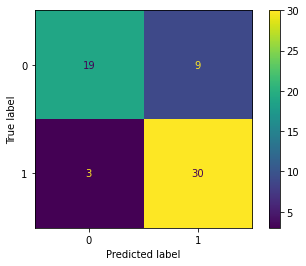

In [63]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(logreg,X_scaled_test,Y_scaled_test)
plt.show()

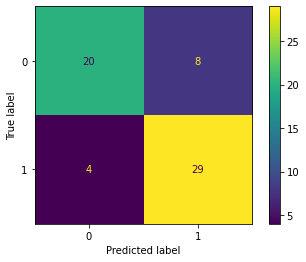

In [64]:
disp_rfc = plot_confusion_matrix(rfc_main,X_scaled_test,Y_scaled_test)
plt.show()

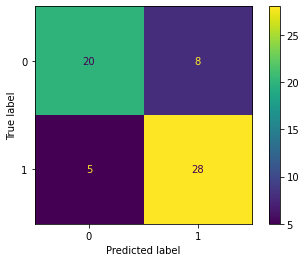

In [65]:
disp_gfc = plot_confusion_matrix(gfc_main,X_scaled_test,Y_scaled_test)
plt.show()

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(Y_scaled_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [69]:
print(classification_report(Y_scaled_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [70]:
print(classification_report(Y_scaled_test,y_gfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
print(roc_auc_score(Y_scaled_test,y_log_pred))

0.7938311688311689


In [73]:
print(roc_auc_score(Y_scaled_test,y_rfc_pred))

0.7965367965367965


In [74]:
print(roc_auc_score(Y_scaled_test,y_gfc_pred))

0.7813852813852814
